# Customer Spending Analysis

## I. Introduction

**1. Background**

  This project focuses on analyzing customer data to understand the factors influencing spending behavior. The dataset is based on the well-known Mall Customer Dataset (200 customers) and has been extended with additional demographic and behavioral variables for deeper analysis.

**2. Dataset**

- Number of observations: 200 customers

- Original variables:

  - CustomerID: Unique identifier for each customer

  - Gender: Gender of the customer

  - Age: Age of the customer

  - Annual Income (k$): Annual income in thousand dollars

  - Spending Score (1-100): Spending score assigned based on behavior and purchasing data

- Extended (synthetic) variables:

  - Occupation: Customer’s occupation (Student, Engineer, Manager, Homemaker, Retired, Other)

  - ShoppingChannel: Preferred shopping channel (Online, Offline)

  - MaritalStatus: Marital status (Single, Married)

  - Membership: Membership tier (Silver, Gold, Platinum)

**3. Objectives**

- Exploratory Data Analysis (EDA):

  - Distribution of age, income, and spending

  - Relationship between demographics and spending behavior

- Inferential Statistics:

  - T-test: Compare average spending between Male vs Female customers

  - ANOVA: Compare average spending across different occupations

  - Chi-square: Examine relationship between shopping channel and gender

  - Confidence Interval: Estimate the mean spending score with confidence intervals

- Insights & Recommendations:

  - Identify high-value customer groups

  - Provide actionable suggestions for customer segmentation and marketing strategies

## II. Processing & Findings


### A. Data overview

In [21]:
#Import librabries and read file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

df = pd.read_csv('/content/drive/MyDrive/Self-projects/New Project/Customer Spending/Mall_Customers_Extended.csv')

In [24]:
#Data checking
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Occupation,ShoppingChannel,MaritalStatus,Membership
0,1,Male,19,15,39,Manager,Offline,Married,Silver
1,2,Male,21,15,81,Student,Online,Single,Platinum
2,3,Female,20,16,6,Homemaker,Online,Married,Silver
3,4,Female,23,16,77,Manager,Online,Married,Platinum
4,5,Female,31,17,40,Manager,Offline,Single,Gold


In [26]:
#Check duplicated rows
duplicates = df.duplicated().sum()
print(f"No of duplicated rows: {duplicates}")

No of duplicated rows: 0


In [35]:
#Count NA/Null in each column
missing = df.isnull().sum()
print(f"Missing value per colum:\n",missing)

Missing value per colum:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Occupation                0
ShoppingChannel           0
MaritalStatus             0
Membership                0
dtype: int64


In [37]:
#Data type check
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Occupation                object
ShoppingChannel           object
MaritalStatus             object
Membership                object
dtype: object


In [38]:
# Unique values for categorical columns
for col in ['Gender', 'Occupation', 'ShoppingChannel', 'MaritalStatus', 'Membership']:
    if col in df.columns:
        print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in Gender: ['Male' 'Female']

Unique values in Occupation: ['Manager' 'Student' 'Homemaker' 'Other' 'Engineer' 'Retired']

Unique values in ShoppingChannel: ['Offline' 'Online']

Unique values in MaritalStatus: ['Married' 'Single']

Unique values in Membership: ['Silver' 'Platinum' 'Gold']


### B. Exploratory Data Analysis (EDA)

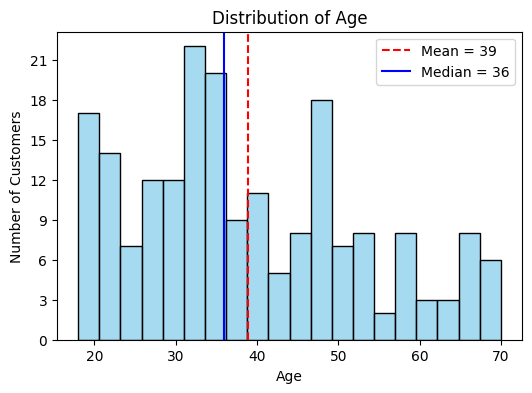

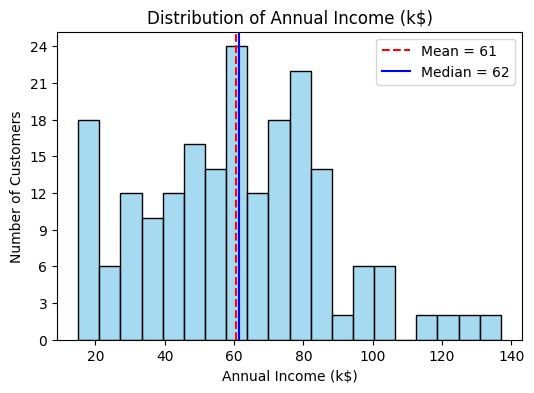

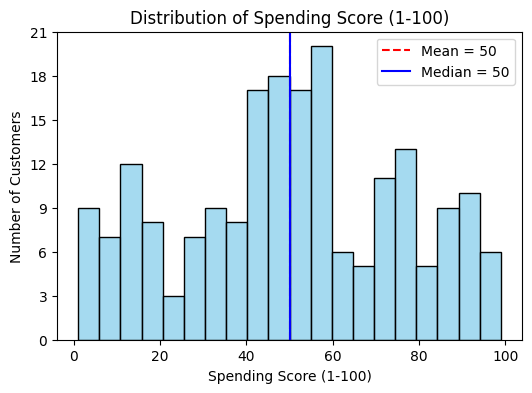

In [64]:
# Distribution of Age, Income and Spending Score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in num_cols:
    plt.figure(figsize=(6,4))
    ax = sns.histplot(df[col], bins=20, kde=False, stat="count",
                      color='skyblue', edgecolor='black')

    # Mean & Median
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.0f}')
    plt.axvline(median_val, color='blue', linestyle='-', label=f'Median = {median_val:.0f}')

    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Number of Customers")
    plt.legend()
    plt.show()


####Distribution of Age, Income, and Spending
### 1. Age
- Customer ages range from **18 to over 70**.  
- The average age (**Mean ≈ 39**) and the median age (**Median ≈ 36**) are relatively close, indicating a fairly balanced distribution without strong skewness.  
- However, the histogram suggests the distribution is not perfectly normal — there are clear clusters, particularly around **30–40 years old**.  
- This implies that the mall primarily attracts **working-age customers**, with the 30–40 segment forming the largest group.  

---

### 2. Annual Income
- Annual incomes range from approximately **15k to 140k USD**.  
- The **Mean (61k)** and **Median (62k)** are nearly identical, which indicates a **symmetric distribution** overall.  
- The data appears to be fairly evenly spread across income levels, with no extreme concentration around a single range.  
- A few customers fall into the **100k+ income group**, standing out as mild outliers.  

---

### 3. Spending Score
- Spending Scores range from **1 to 100**, with both the **Mean and Median equal to 50**.  
- Unlike age or income, the distribution is **multi-modal** — customers are not clustered around one central score, but rather spread into distinct groups: low spenders, medium spenders, and high spenders.  
- This strongly suggests **heterogeneous purchasing behavior** among customers.  

---

## 📌 Overall Insights
- **Age**: The customer base is concentrated in the 30–40 range, a prime demographic for consumer spending.  
- **Income**: Distribution is balanced across different income groups, with some high-income outliers.  
- **Spending Score**: Customers can be clearly segmented into different spending levels, making this variable highly valuable for **customer segmentation and targeted marketing strategies**.  


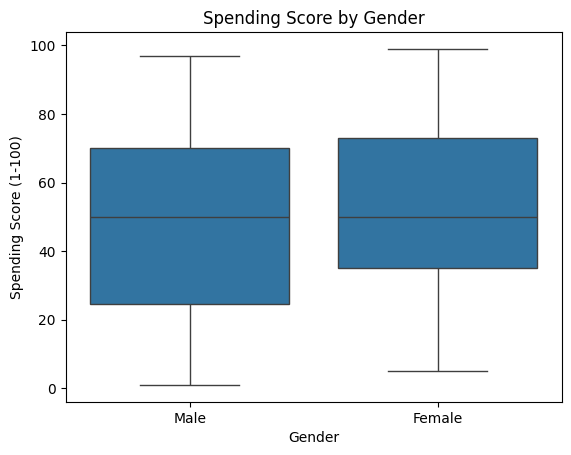

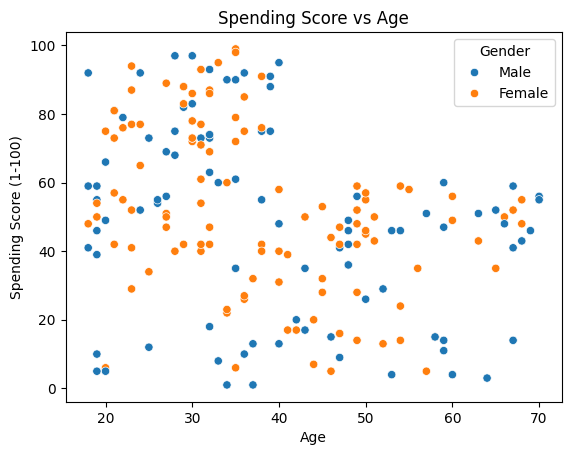

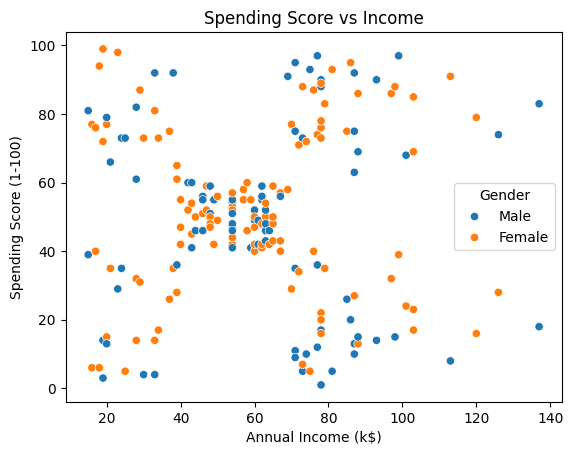

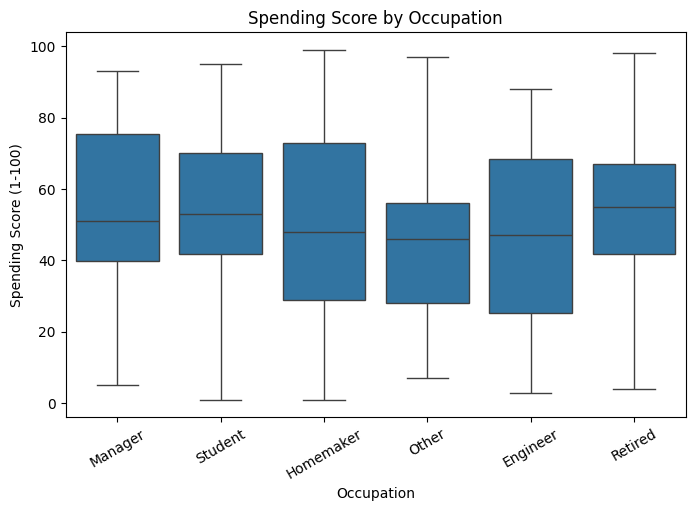

In [65]:
# Spending vs Gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title("Spending Score by Gender")
plt.show()

# Spending vs Age
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title("Spending Score vs Age")
plt.show()

# Spending vs Income
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title("Spending Score vs Income")
plt.show()

# Spending vs Occupation
if 'Occupation' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Occupation', y='Spending Score (1-100)', data=df)
    plt.title("Spending Score by Occupation")
    plt.xticks(rotation=30)
    plt.show()

####Relationship Between Demographics and Spending Behavior

### 1. Gender vs Spending Score
The boxplot shows that **male and female customers have a similar median spending score (~50)**, with overlapping interquartile ranges.  
- Female customers appear slightly more spread out across the higher range (60–100), while male customers show more presence in the lower range as well.  
- However, the overall difference between genders is not strong.  

  => Insight: Gender alone does not significantly differentiate spending behavior, but female customers may contribute more to the higher-spending group.

---

### 2. Age vs Spending Score
The scatterplot indicates a clear pattern:  
- Younger customers, especially those in their **20s and early 30s**, cluster around higher spending scores (60–100).  
- Customers above 40 show a wider spread, with many clustered in lower spending ranges.  

  => Insight: Younger customers are generally more active spenders, making them an important demographic for targeted marketing campaigns.

---

### 3. Income vs Spending Score
The scatterplot reveals **no strong positive correlation** between income and spending score:  
- Some **high-income customers (100k+)** still have very low spending scores.  
- Meanwhile, several customers with **moderate income levels (40k–70k)** show high spending scores.  

  => Insight: Spending behavior is **not driven by income alone**. Lifestyle, engagement, or personal preferences likely play a stronger role than income level.

---

### 4. Occupation vs Spending Score
The boxplot shows differences across occupation groups:  
- **Students** and some **managers** tend to have higher spending scores.  
- **Retired customers** and certain occupational categories show lower averages.  
- Other groups (engineers, homemakers) are spread more evenly.  

  => Insight: Occupation influences spending behavior. Younger or professionally active groups (students, managers) tend to spend more, while retirees are more conservative. This creates opportunities for segmentation by occupation.  

---

## 📌 Key Takeaways
- **Gender**: Not a strong differentiator, though females lean slightly higher in spending.  
- **Age**: Younger customers (20–35) are the most active spenders.  
- **Income**: Weak correlation — high income does not guarantee high spending.  
- **Occupation**: Stronger indicator than gender or income — useful for segmentation strategies.  

Overall, the analysis confirms that **multi-dimensional segmentation (age + occupation + spending)** is more effective than relying on single demographic factors like gender or income.


### C. Inferential Statistics

In [66]:
#T-Test: Compare avg spending between Male vs Female
from scipy.stats import ttest_ind

# Break data
male_spending = df[df['Gender'] == 'Male']['Spending Score (1-100)']
female_spending = df[df['Gender'] == 'Female']['Spending Score (1-100)']

# Independent T-test
t_stat, p_val = ttest_ind(male_spending, female_spending, equal_var=False)  # Welch’s T-test

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Result
if p_val < 0.05:
    print("✅ There is a significant difference in Spending Score between Male and Female.")
else:
    print("❌ There is no significant difference in Spending Score between Male and Female.")


T-statistic: -0.805
P-value: 0.422
❌ There is no significant difference in Spending Score between Male and Female.


#### T-test: Male vs Female Spending Score  

We conducted an independent T-test to examine whether there is a significant difference in **Spending Score (1–100)** between male and female customers.  

- **Null Hypothesis (H₀):** There is no difference in the mean spending score between Male and Female customers.  
- **Alternative Hypothesis (H₁):** There is a difference in the mean spending score between Male and Female customers.  

The test results are as follows:  
- **T-statistic = -0.805**  
- **P-value = 0.422**  

Since the p-value (0.422) is **greater than 0.05**, we **fail to reject the null hypothesis**. This means that there is **no statistically significant difference** in the average spending score between Male and Female customers.  

👉 **Interpretation:** Gender does not appear to be a major factor influencing the overall spending behavior of customers in this dataset. Both male and female customers spend at relatively similar levels on average.  

**Business Insight:** Marketing strategies should not be strongly differentiated by gender alone. Other factors such as age, income, or occupation may provide more meaningful customer segmentation.

In [67]:
from scipy.stats import f_oneway

# Group Spending Score by Occupation
groups = [group['Spending Score (1-100)'].values
          for name, group in df.groupby('Occupation')]

# ANOVA test
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("✅ There is a significant difference in Spending Score among occupations.")
else:
    print("❌ There is no significant difference in Spending Score among occupations.")


F-statistic: 0.534
P-value: 0.750
❌ There is no significant difference in Spending Score among occupations.


#### ANOVA Test Interpretation

I performed a one-way ANOVA to examine whether there are significant differences
in Spending Score among different occupations.

- F-statistic: 0.534  
- P-value: 0.750  

Since the P-value (0.750) is much greater than 0.05, we fail to reject the null hypothesis.  
This means that there is **no statistically significant difference** in Spending Score
across occupations. In other words, occupation does not appear to have a major impact
on customers' spending behavior in this dataset.


In [68]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(df['Gender'], df['ShoppingChannel'])
print("Contingency Table:\n", contingency)

# Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"\nChi2 Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Result
if p < 0.05:
    print("✅ There is a significant relationship between Gender and Shopping Channel.")
else:
    print("❌ No significant relationship between Gender and Shopping Channel.")


Contingency Table:
 ShoppingChannel  Offline  Online
Gender                          
Female                63      49
Male                  45      43

Chi2 Statistic: 0.333
P-value: 0.564
Degrees of Freedom: 1
Expected Frequencies:
 [[60.48 51.52]
 [47.52 40.48]]
❌ No significant relationship between Gender and Shopping Channel.


#### Chi-Square Test: Gender vs Shopping Channel

The Chi-Square test was conducted to examine the relationship between **Gender** and **Shopping Channel** (Online vs. Offline).

- **Observed Frequencies:**
  - Female: Offline = 63, Online = 49
  - Male:   Offline = 45, Online = 43  

- **Expected Frequencies (if independent):**
  - Female: Offline = 60.48, Online = 51.52
  - Male:   Offline = 47.52, Online = 40.48  

The Chi-Square statistic is **0.333** with a **p-value of 0.564**.  
Since p-value > 0.05, we **fail to reject the null hypothesis**, meaning there is **no statistically significant relationship** between gender and shopping channel.  

📌 **Interpretation:**  
Although raw counts suggest that female customers tend to shop offline slightly more than males, the difference is very close to the expected baseline under independence. Thus, this pattern is **not strong enough to be considered statistically significant** and may simply be due to random variation in the sample.


In [70]:
import numpy as np
import scipy.stats as st

spending = df['Spending Score (1-100)']

# Cal mean + standard error
mean = np.mean(spending)
sem  = st.sem(spending, nan_policy='omit')   # standard error
dfree = len(spending) - 1

ci_low, ci_high = st.t.interval(confidence=0.95, df=dfree, loc=mean, scale=sem)

print(f"Mean Spending Score: {mean:.2f}")
print(f"95% Confidence Interval: ({ci_low:.2f}, {ci_high:.2f})")

Mean Spending Score: 50.20
95% Confidence Interval: (46.60, 53.80)


#### Estimate the mean spending score with confidence intervals

- The average Spending Score is 50.2, and the 95% Confidence Interval ranges from 46.6 to 53.8.  
- This means we can be 95% confident that the true average Spending Score of the entire customer population lies within this interval.  

From a business perspective:
- The spending behavior of customers is centered around 50, with moderate variation.  
- Since the confidence interval is relatively narrow, the estimate is reliable enough to be used as a basis for business strategies.  
- Companies can treat ~50 as a stable benchmark to segment customers, design loyalty programs, or compare with other demographic groups.


## III. Conclusion and **Recommendations**